**FIFA World Cup Analysis**

UpenderKonda

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
Load all DataFiles
# Assuming your CSV files are in the 'data' directory within the current working directory
matches = pd.read_csv('/WorldCupMatches.csv')
players = pd.read_csv('/WorldCupPlayers.csv')
worldcups = pd.read_csv('/WorldCups.csv')

In [ ]:
worldcups['GoalsScored'] = worldcups['GoalsScored'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)
worldcups['QualifiedTeams'] = worldcups['QualifiedTeams'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)
worldcups['MatchesPlayed'] = worldcups['MatchesPlayed'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)
worldcups['Attendance'] = worldcups['Attendance'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)

In [ ]:

 # Setting the maximum number of columns pandas will display to None, which means it will display all columns in the DataFrame.
pd.pandas.set_option('display.max_columns', None)

In [ ]:
#loading the first +5 rows of the DataFrame df
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#loading the first 5 rows of the DataFrame df
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [ ]:
#loading the first 5 rows of the DataFrame df
worldcups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [ ]:
#checking the shape of the DataFrame df
matches.shape

(4572, 20)

In [ ]:
#checking the shape of the DataFrame df
players.shape

(37784, 9)

In [ ]:
#checking the shape of the DataFrame df
worldcups.shape

(20, 10)

Handle missing values in the DataSet

In [ ]:
print("WorldCups Dataset Missing Values:")
print(worldcups.isnull().sum())
print("\nWorldCupMatches Dataset Missing Values:")
print(matches.isnull().sum())
print("\nWorldCupPlayers Dataset Missing Values:")
print(players.isnull().sum())

WorldCups Dataset Missing Values:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

WorldCupMatches Dataset Missing Values:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

WorldCupPlayers Dataset Missing Values:
RoundID              0
MatchID              0
Team Initials        0
Coach Nam

In [ ]:
worldcups.fillna(method='ffill', inplace=True)

matches.dropna(subset=['Home Team Name', 'Away Team Name'], inplace=True)  # Drop rows with missing team names
matches['Attendance'].fillna(matches['Attendance'].mean(), inplace=True)  # Fill missing attendance with mean

players.dropna(subset=['Player Name', 'Team Initials'], inplace=True)  # Drop rows with missing player names or team initials
players['Event'].fillna('None', inplace=True)  # Fill missing events with 'None'

In [ ]:
print("WorldCups Dataset Missing Values:")
print(worldcups.isnull().sum())
print("\nWorldCupMatches Dataset Missing Values:")
print(matches.isnull().sum())
print("\nWorldCupPlayers Dataset Missing Values:")
print(players.isnull().sum())

WorldCups Dataset Missing Values:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

WorldCupMatches Dataset Missing Values:
Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

WorldCupPlayers Dataset Missing Values:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0


In [ ]:
sns.set(style="whitegrid")

Goals Scored Over the Years

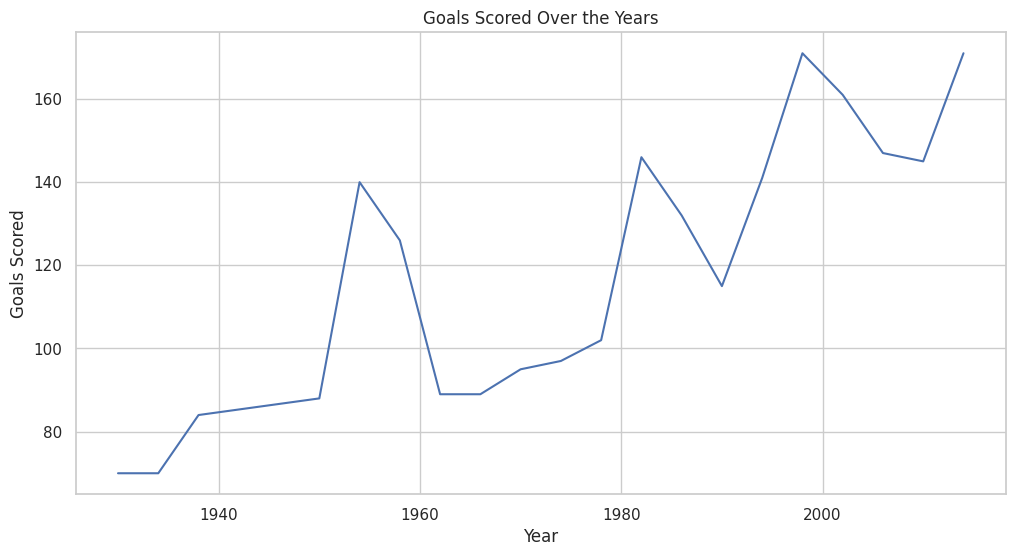

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='GoalsScored')
plt.title('Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

Attendance Over the Years

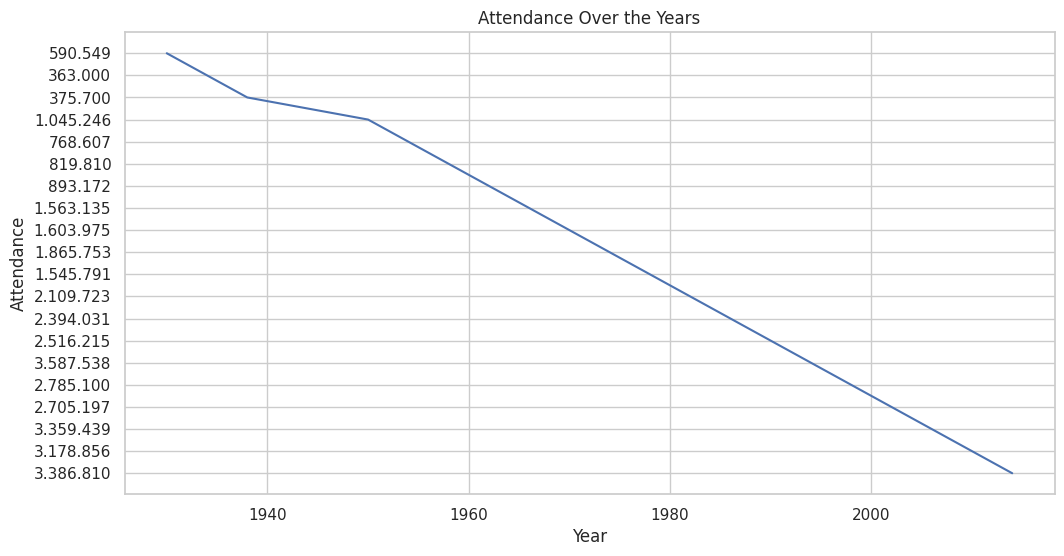

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='Attendance')
plt.title('Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.show()

Number of Qualified Teams Over the Years

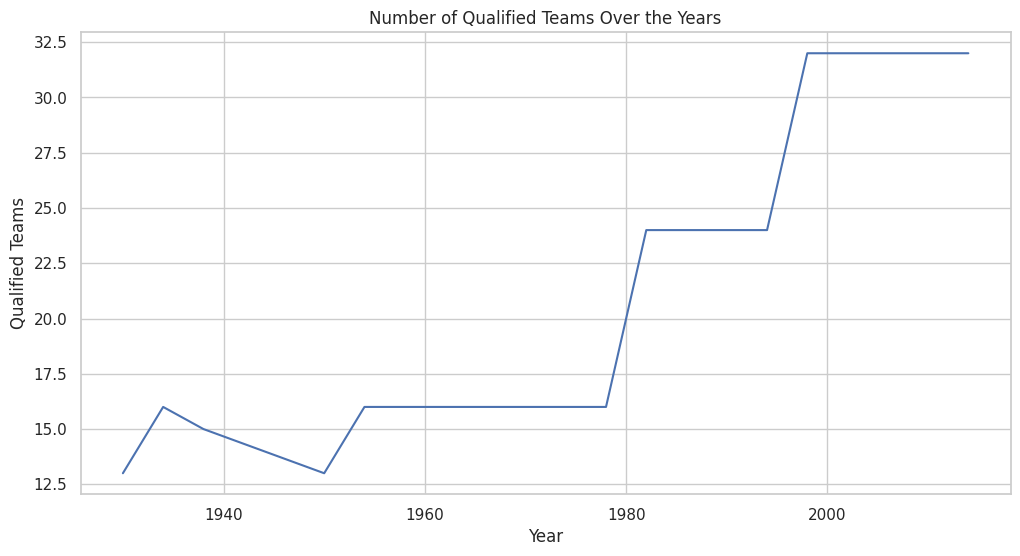

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='QualifiedTeams')
plt.title('Number of Qualified Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Qualified Teams')
plt.show()

Number of Matches Played Over the Years

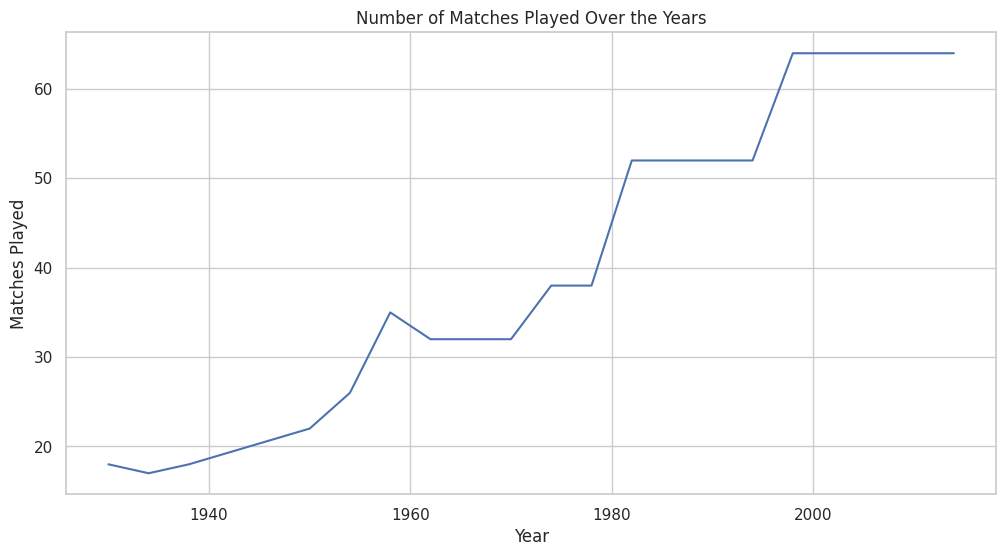

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='MatchesPlayed')
plt.title('Number of Matches Played Over the Years')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.show()


Plots for WorldCupMatches DataSet

In [ ]:
# Convert 'Datetime' to datetime format
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']
avg_goals_per_match = matches.groupby('Year')['Total Goals'].mean().reset_index()


Plot average goals per match over the years

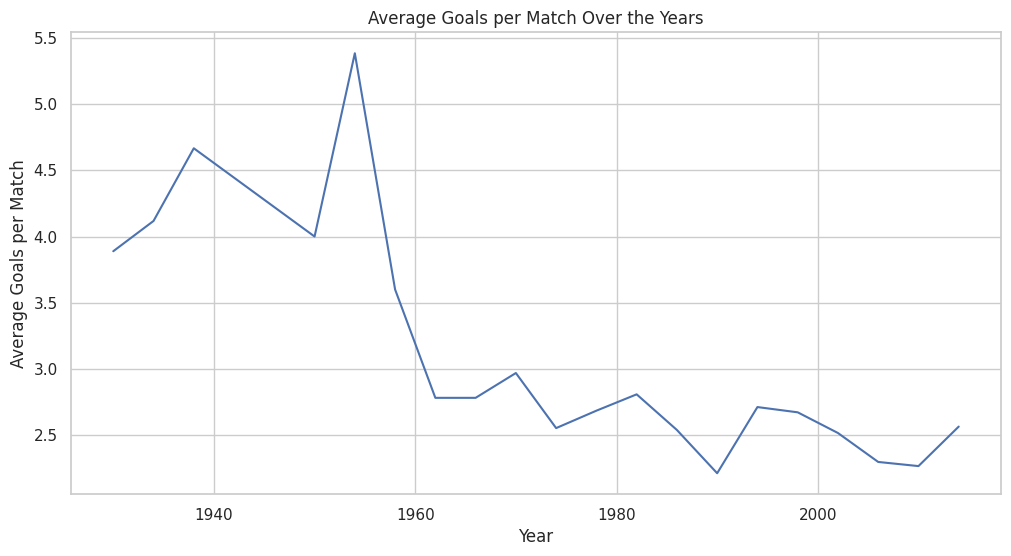

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_goals_per_match, x='Year', y='Total Goals')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.show()

Distribution of goals in matches

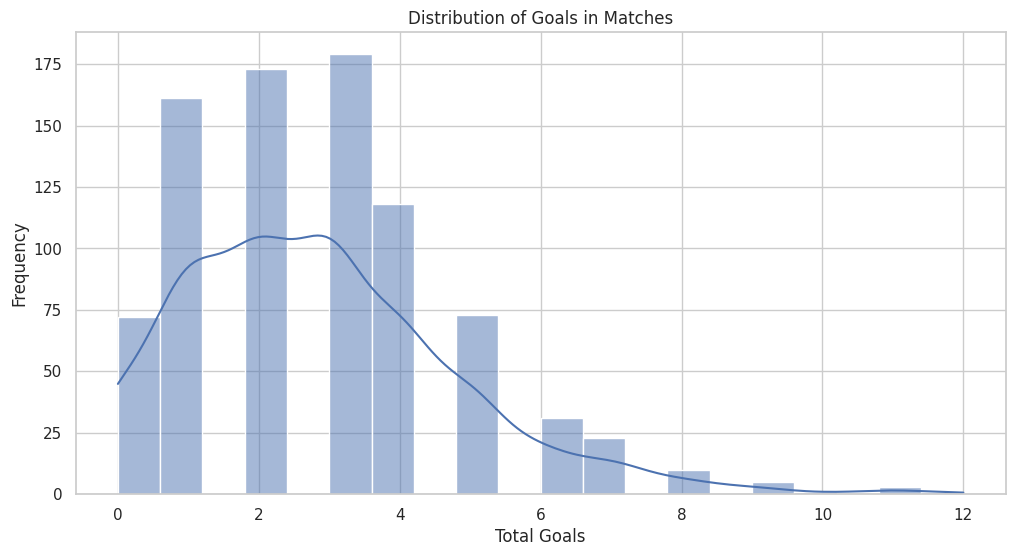

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(matches['Total Goals'], bins=20, kde=True)
plt.title('Distribution of Goals in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

Goals by Stage

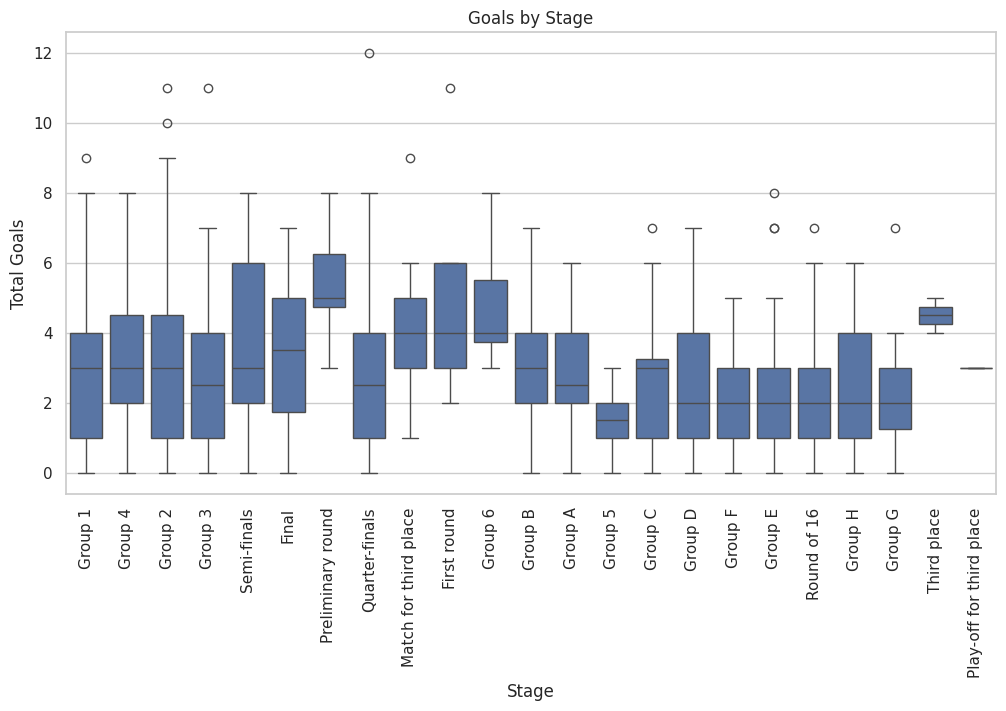

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=matches, x='Stage', y='Total Goals')
plt.title('Goals by Stage')
plt.xlabel('Stage')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

Attendance by Year

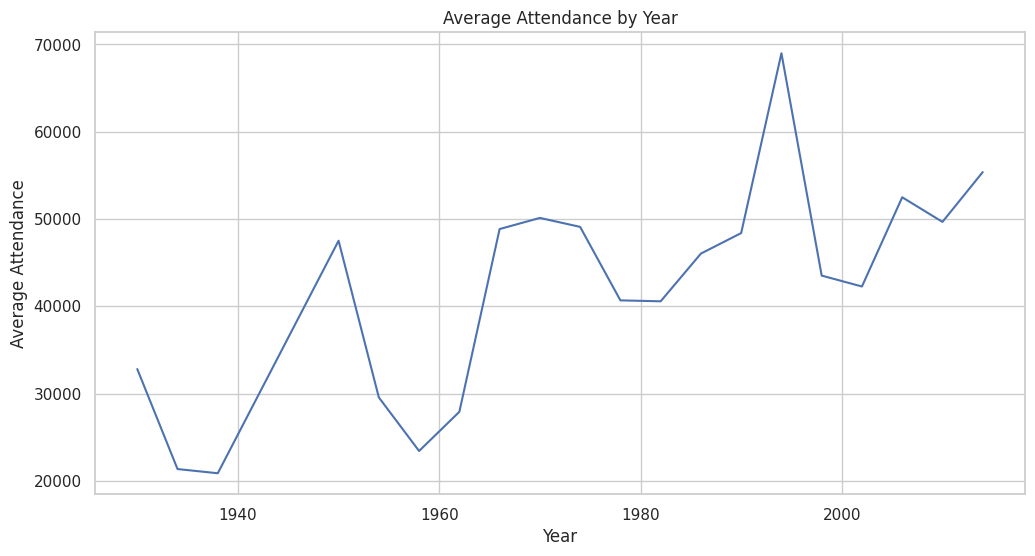

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=matches.groupby('Year')['Attendance'].mean().reset_index(), x='Year', y='Attendance')
plt.title('Average Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.show()

Plots for WorldCupPlayers DataSet

Participation by Country

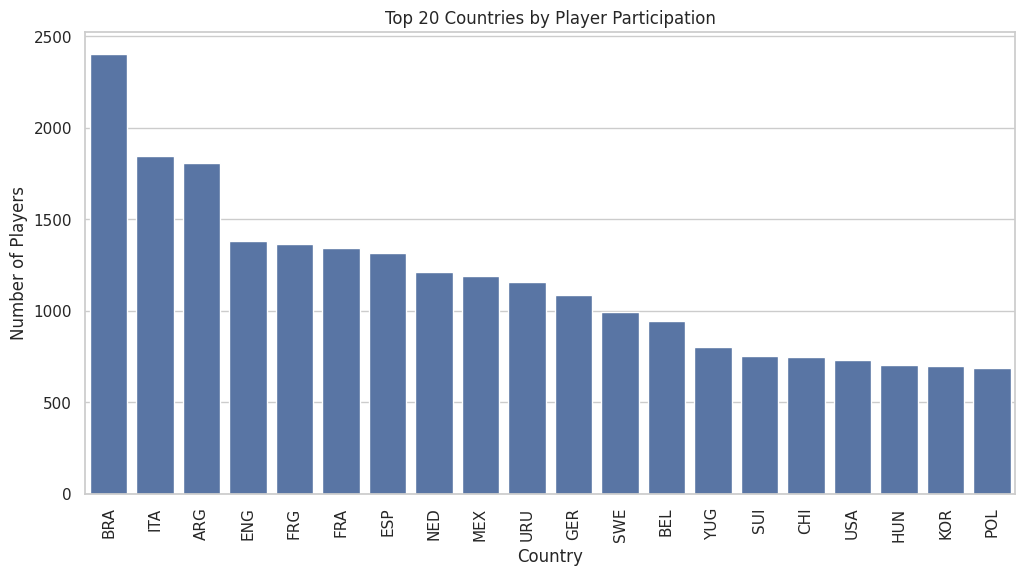

In [ ]:
plt.figure(figsize=(12, 6))
country_participation = players['Team Initials'].value_counts().head(20)
sns.barplot(x=country_participation.index, y=country_participation.values)
plt.title('Top 20 Countries by Player Participation')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()


Positions of Players

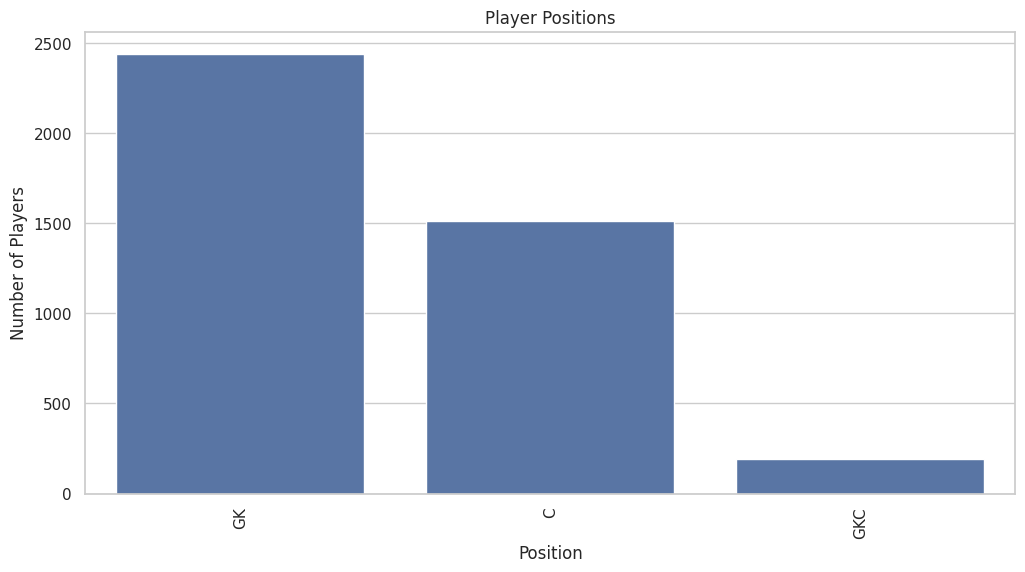

In [ ]:
plt.figure(figsize=(12, 6))
position_counts = players['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Player Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

Combined Insights

Goals scored by winning teams

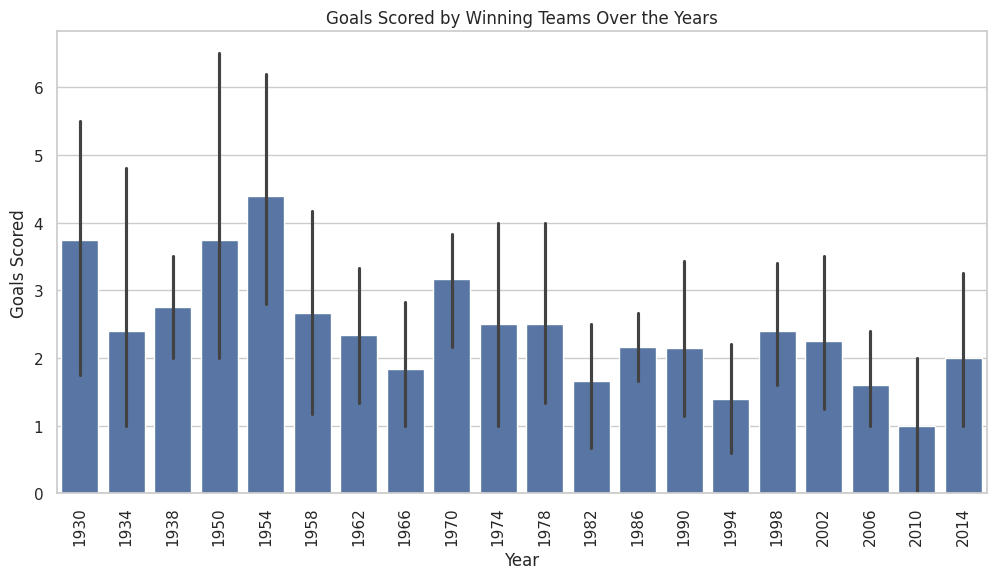

In [ ]:

winning_teams = worldcups[['Year', 'Winner', 'GoalsScored']]
winning_team_goals = pd.merge(winning_teams, matches, left_on=['Year', 'Winner'], right_on=['Year', 'Home Team Name'])
winning_team_goals['Winning Team Goals'] = winning_team_goals['Home Team Goals']

plt.figure(figsize=(12, 6))
sns.barplot(data=winning_team_goals, x='Year', y='Winning Team Goals')
plt.title('Goals Scored by Winning Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.show()

Comparison of Home and Away Goals


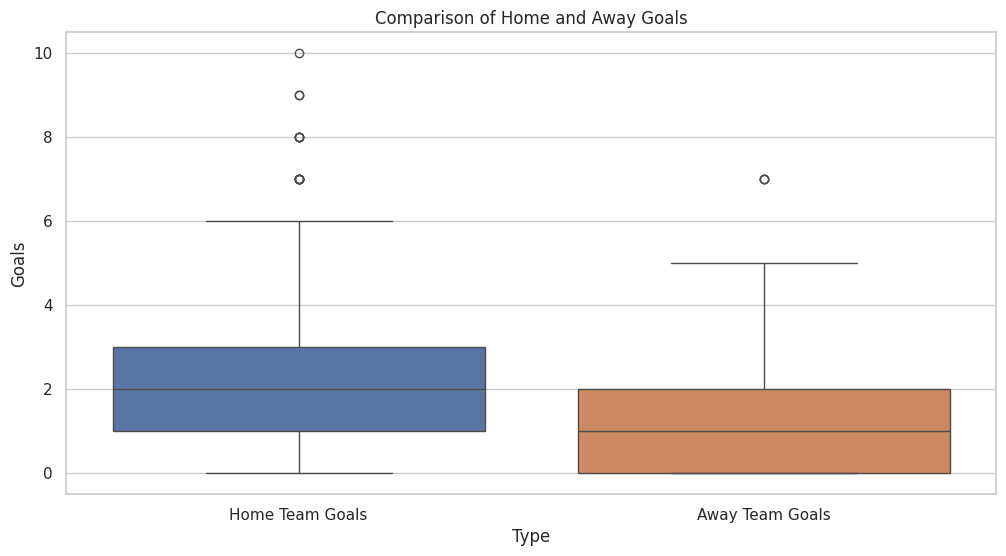

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=matches[['Home Team Goals', 'Away Team Goals']])
plt.title('Comparison of Home and Away Goals')
plt.xlabel('Type')
plt.ylabel('Goals')
plt.xticks([0, 1], ['Home Team Goals', 'Away Team Goals'])
plt.show()

Stadium with the highest attendance

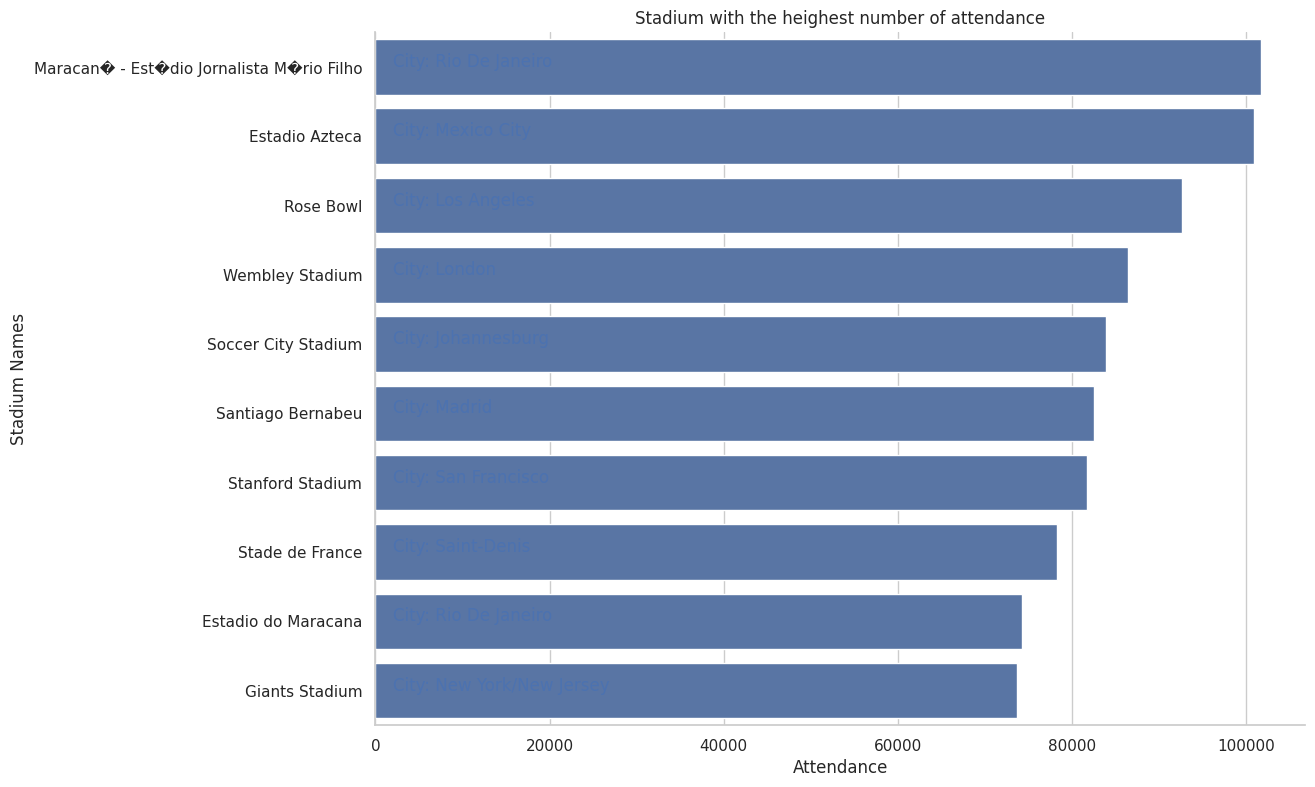

In [ ]:

matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')

plt.show()